# Analyze Supermarket Data Across the Country - Company XYZ

Company XYZ owns a supermarket chain across the country. Each major branch located in 3 cities across the country recorded sales information for 3 months, to help the company understand sales trends and determine its growth, as the rise of supermarkets competition is seen.

You will apply learnings to analyse the dataset in the data folder, and the description of each feature can be found in this [link](https://docs.google.com/document/d/1Sv-DlynHpOBAs5qKokn5MtbzqZcumTSlSI4-wQ0kf0w/edit?usp=sharing)

## Step 1 - Loading the Dataset
In this step, you will combine the dataset from each branch (3 branches) into one dataset for easy analysis. You expected to write the syntaxes that will read multiple files from your current working directory and export a CSV file after combining. 
The learning from this step is the ability to automate reading and combining multiple CSV files, because as a Data Professional, you will saddled with the responsibility of reading data from different sources, and this is one of the use case.

#### To-Do - Import Libraries

In [266]:
import os
import glob
import pandas as pd
os.chdir("C:/Users/Phantom/Documents/Git Files/Data-Analysis-Project")  #Current working directory

#### To-Do - Use glob to match the pattern "csv"

In [267]:
extension = 'csv'
# List of csv file in the directory
print('\nList of csv files in the directory:')

supermarket=[]
for name in glob.glob('*.'+extension):
    print(name)
    supermarket.append(name)   


List of csv files in the directory:
3Branch_data.csv
Abuja_Branch.csv
Lagos_Branch.csv
Port_Harcourt_Branch.csv


#### To-Do - Combine all the files in the generated list above and export to a CSV
Tips - Use the `pd.concat` method

In [268]:
#Export to csv
#[Combining the data for the 3 branches]
abuja_data = pd.read_csv(supermarket[0])
lagos_data = pd.read_csv(supermarket[1])
ph_data = pd.read_csv(supermarket[2])

allBranch_df = pd.concat([abuja_data, lagos_data, ph_data], ignore_index=False)
allBranch_df.to_csv("3Branch_data.csv")

#### To-Do -Read the CSV file using `pd.read_csv` method

In [269]:
allBranch_df = pd.read_csv("3Branch_data.csv")

## Step 2 - Data Exploration
In this step you will explore the loaded dataset using some built-in Pandas function. You expected to begin to think about your analytical approach from here. 
You can include other methods that you might think will make your exploration process easier. For Instance, you can write a function that print out a summary of the missing data occurence in the data. Be sure to document these methods using `markdown` and in-line `comments`.

### Import Libraries

In [270]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')  
import warnings
warnings.filterwarnings('ignore')

#### To-Do - Use the head() method to view first few rows of the dataset

In [271]:
# Deleting the autogenerated index column "Unnamed: 0" from the dataframe
allBranch_df = allBranch_df.drop(labels="Unnamed: 0", axis=1) 

allBranch_df.head()

,Unnamed: 0.1,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,0.00,692-92-5582,B,Abuja,Member,Female,Food and beverages,"19,742.40",3,"2,961.36","62,188.56",2/20/2019,13:27,Card,"59,227.20",4.76,"2,961.36",5.90
1,1.00,351-62-0822,B,Abuja,Member,Female,Fashion accessories,"5,212.80",4,"1,042.56","21,893.76",2/6/2019,18:07,Epay,"20,851.20",4.76,"1,042.56",4.50
2,2.00,529-56-3974,B,Abuja,Member,Male,Electronic accessories,"9,183.60",4,"1,836.72","38,571.12",3/9/2019,17:03,Cash,"36,734.40",4.76,"1,836.72",6.80
3,3.00,299-46-1805,B,Abuja,Member,Female,Sports and travel,"33,739.20",6,"10,121.76","212,556.96",1/15/2019,16:19,Cash,"202,435.20",4.76,"10,121.76",4.50
4,4.00,319-50-3348,B,Abuja,Normal,Female,Home and lifestyle,"14,508.00",2,"1,450.80","30,466.80",3/11/2019,15:30,Epay,"29,016.00",4.76,"1,450.80",4.40


#### To-Do - Check the number of rows and columns present in the data using the shape attribute.

In [272]:
print("The number of (columns, rows) =")
allBranch_df.shape

The number of (columns, rows) =


(1672, 18)

#### To-Do - Generate the names of the columns using the columns attribute.

In [273]:
print("The names of the columns are: ")
allBranch_df.columns

The names of the columns are: 


Index(['Unnamed: 0.1', 'Invoice ID', 'Branch', 'City', 'Customer type',
       'Gender', 'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total',
       'Date', 'Time', 'Payment', 'cogs', 'gross margin percentage',
       'gross income', 'Rating'],
      dtype='object')

#### To-Do - Statiscal Summary
The describe method provides the data statistical summary for the dataset, use the method to explore the statistical summary.

In [274]:
print("Below are the statistical summary for the dataset: ")

# Setting a fixed 2 decimal places
pd.options.display.float_format = '{:,.2f}'.format
allBranch_df.describe()


Below are the statistical summary for the dataset: 


,Unnamed: 0.1,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,"1,000.00","1,672.00","1,672.00","1,672.00","1,672.00","1,672.00","1,672.00","1,672.00","1,672.00"
mean,166.20,"19,975.80",5.50,"5,489.04","115,269.93","109,780.89",4.76,"5,489.04",6.95
std,96.34,"9,487.64",2.90,"4,153.09","87,214.99","83,061.90",0.00,"4,153.09",1.72
min,0.00,"3,628.80",1.00,183.06,"3,844.26","3,661.20",4.76,183.06,4.00
25%,83.00,"11,775.60",3.00,"2,153.61","45,225.81","43,072.20",4.76,"2,153.61",5.50
50%,166.00,"19,742.40",5.00,"4,324.32","90,810.72","86,486.40",4.76,"4,324.32",6.90
75%,249.25,"27,870.30",8.00,"8,048.61","169,020.81","160,972.20",4.76,"8,048.61",8.40
max,339.00,"35,985.60",10.00,"17,874.00","375,354.00","357,480.00",4.76,"17,874.00",10.00


#### To-Do - Below this cell write in few sentences what you can derive from the data statistical summary

- A total of 1000 sales were made across the three branches for the 3-month period. 
- The highest total sale to a customer is ₦375,354.00 while the minimum is ₦3,844.26 with a constant 
  gross margin percentage of 4.76% over the study period.
- As an indication of the variation of customer satisfaction, the minimum service rating is 4 and the maximum is 10 
  with an average value of 6.97.

#### To-Do - Missing values
The `isnull`, and `notna` methods can provide a quick overview of the missing data occurence, use that to observe the presence of missing data in the dataset. You can add the sum method to get a summary and not boolean values.

In [275]:
allBranch_df.isnull()

,Unnamed: 0.1,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1667,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1668,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1669,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1670,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [276]:
allBranch_df.isnull().sum()

Unnamed: 0.1               672
Invoice ID                   0
Branch                       0
City                         0
Customer type                0
Gender                       0
Product line                 0
Unit price                   0
Quantity                     0
Tax 5%                       0
Total                        0
Date                         0
Time                         0
Payment                      0
cogs                         0
gross margin percentage      0
gross income                 0
Rating                       0
dtype: int64

In [277]:
allBranch_df.notna()

,Unnamed: 0.1,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1667,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
1668,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
1669,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
1670,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


In [278]:
allBranch_df.notna().sum()

Unnamed: 0.1               1000
Invoice ID                 1672
Branch                     1672
City                       1672
Customer type              1672
Gender                     1672
Product line               1672
Unit price                 1672
Quantity                   1672
Tax 5%                     1672
Total                      1672
Date                       1672
Time                       1672
Payment                    1672
cogs                       1672
gross margin percentage    1672
gross income               1672
Rating                     1672
dtype: int64

#### To-Do - Data Information
The `info()` function is used to print a concise summary of a DataFrame. This method prints information about a DataFrame including the index dtype and column dtypes, non-null values and memory usage. Use this method to observe the data type of each feature.

In [279]:
allBranch_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1672 entries, 0 to 1671
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0.1             1000 non-null   float64
 1   Invoice ID               1672 non-null   object 
 2   Branch                   1672 non-null   object 
 3   City                     1672 non-null   object 
 4   Customer type            1672 non-null   object 
 5   Gender                   1672 non-null   object 
 6   Product line             1672 non-null   object 
 7   Unit price               1672 non-null   float64
 8   Quantity                 1672 non-null   int64  
 9   Tax 5%                   1672 non-null   float64
 10  Total                    1672 non-null   float64
 11  Date                     1672 non-null   object 
 12  Time                     1672 non-null   object 
 13  Payment                  1672 non-null   object 
 14  cogs                    

## Step 3 - Dealing with DateTime Features

From the summary above, you can observe that the `date` and `time` columns are not in the appropriate data type
you can convert to `datetime` datatype using the `to_datetime()` method. After that is done, use the type attribute 
to confirm the datatype. 

#### To-Do - Use `to_datetime()` to convert the `date` column to `datetime`

In [280]:
allBranch_df["Date"] = pd.to_datetime(allBranch_df["Date"])

#### To-Do - Check the datatype to confirm if it's in `datetime`

In [281]:
print(allBranch_df.dtypes["Date"])


datetime64[ns]


#### To-Do - Repeat the two steps above to the `time` column

In [282]:
allBranch_df["Time"] = pd.to_datetime(allBranch_df["Time"])
print(allBranch_df.dtypes["Time"])

datetime64[ns]


## Extract Features from date & time

#### To-Do - Extract the Day feature from the `Date` column, and save to a new `Day` column

In [283]:
import datetime as dt
allBranch_df.insert(loc=11, column="Day", value=allBranch_df["Date"].dt.day)
#allBranch_df["Day"] = allBranch_df["Date"].dt.day

#### To-Do - Extract the Month feature from the `Date` column, and save to a new `Month` column

In [284]:
allBranch_df.insert(loc=12, column="Month", value=allBranch_df["Date"].dt.month)

#### To-Do -Extract the Year feature from the `Date` column, and save to a new `Year` column  

In [285]:
allBranch_df.insert(loc=13, column="Year", value=allBranch_df["Date"].dt.year)

#### To-Do - Extract the `Hour` feature from the `Time` column and save to a new `Hour` column

In [286]:
allBranch_df.insert(loc=15, column="Hour", value=allBranch_df["Time"].dt.hour)

#### Pandas provide the `nunique()` method to get a count of unique values, while the `unique()` function is used to get unique values of Series object.

#### To-Do -  From the hours information, determine the numbers of unique hours of sales in the supermarket, and return an array of the hours using the unique() method

In [287]:
allBranch_df["Hour"].nunique()

11

In [288]:
allBranch_df["Hour"].unique()

array([13, 18, 17, 16, 15, 10, 12, 19, 14, 11, 20], dtype=int64)

## Step 4 - Unique Values in Columns

With the line of code below, we can get a list of the categorical column in the dataset. We iterate through the columns and check if each element is an object datatype. The result is saved to the "categorical_columns" variable
as a list.

In [289]:
categorical_columns = [col for col in allBranch_df.columns if allBranch_df[col].dtype == "object" ]
categorical_columns

['Invoice ID',
 'Branch',
 'City',
 'Customer type',
 'Gender',
 'Product line',
 'Payment']

#### To-Do- From the information above, generate the unique values in the categorical columns (apart from the example - Branch column).
For example, the unique values of the "Branch" column is displayed in list, as shown below.
<br/>
`df['Branch'].unique().tolist()
['B', 'C', 'A']`
</br>
<br/>
You can add print formating syntax to print out the total numbers of these values in a particular column. 

In [290]:
allBranch_df['Branch'].unique().tolist()

['B', 'A', 'C']

In [291]:
print("Total Number of unique values in the Branch Column : {}". format(len(allBranch_df['Branch'].unique().tolist())))

Total Number of unique values in the Branch Column : 3


In [292]:
for index, item in enumerate(["Invoice ID","City","Customer type","Gender","Product line","Payment"]):
    print(item+":", allBranch_df[item].unique().tolist(),"\n")
    print("Total Number of unique values in the",item+":", "Column is = {}". format(len(allBranch_df[item].unique().tolist())),"\n")
    print("---------------------------------------------------------------")

Invoice ID: ['692-92-5582', '351-62-0822', '529-56-3974', '299-46-1805', '319-50-3348', '371-85-5789', '273-16-6619', '649-29-6775', '145-94-9061', '871-79-8483', '149-71-6266', '640-49-2076', '777-82-7220', '280-35-5823', '354-25-5821', '132-32-9879', '370-41-7321', '727-46-3608', '669-54-1719', '616-24-2851', '242-55-6721', '347-34-2234', '853-23-2453', '109-28-2512', '510-95-6347', '847-38-7188', '318-68-5053', '152-08-9985', '766-85-7061', '733-01-9107', '716-39-1409', '479-26-8945', '227-78-1148', '291-32-1427', '659-65-8956', '378-24-2715', '219-22-9386', '268-27-6179', '549-84-7482', '191-10-6171', '695-51-0018', '590-83-4591', '241-72-9525', '262-47-2794', '608-96-3517', '279-74-2924', '307-85-2293', '743-04-1105', '423-57-2993', '548-46-9322', '505-02-0892', '316-55-4634', '608-27-6295', '414-12-7047', '895-66-0685', '305-14-0245', '732-04-5373', '284-34-9626', '437-58-8131', '641-43-2399', '542-41-0513', '875-46-5808', '394-43-4238', '573-58-9734', '817-69-8206', '142-63-6033

Total Number of unique values in the Product line: Column is = 6 

---------------------------------------------------------------
Payment: ['Card', 'Epay', 'Cash'] 

Total Number of unique values in the Payment: Column is = 3 

---------------------------------------------------------------


#### To-Do: The `value_counts()` function is used to get a Series containing counts of unique values. For the categorical columns above, generate the count figure of the values using the `value_counts() ` method.


In [293]:
for index, item in enumerate(["City","Branch","Invoice ID","Customer type","Gender","Product line","Payment"]):
    print("The count for each unique values in the",item, "Column is =","\n", allBranch_df[item].value_counts(),"\n")

The count for each unique values in the City Column is = 
 Lagos            680
Abuja            664
Port Harcourt    328
Name: City, dtype: int64 

The count for each unique values in the Branch Column is = 
 A    680
B    664
C    328
Name: Branch, dtype: int64 

The count for each unique values in the Invoice ID Column is = 
 692-92-5582    2
898-04-2717    2
563-91-7120    2
746-54-5508    2
815-11-1168    2
              ..
603-07-0961    1
428-83-5800    1
174-36-3675    1
227-07-4446    1
233-67-5758    1
Name: Invoice ID, Length: 1000, dtype: int64 

The count for each unique values in the Customer type Column is = 
 Normal    839
Member    833
Name: Customer type, dtype: int64 

The count for each unique values in the Gender Column is = 
 Male      848
Female    824
Name: Gender, dtype: int64 

The count for each unique values in the Product line Column is = 
 Fashion accessories       291
Sports and travel         287
Electronic accessories    285
Food and beverages        28

## Step 5 - Aggregration with GroupBy

#### To-Do - Your task here, will be to create a groupby object with the "City Column", and aggregation function of sum and mean. 

In [294]:
city_order = allBranch_df.groupby("City")
# aggregation function of sum and mean on which column? Not stated.
city_order.agg({'Unit price': ["sum", "mean"],'Tax 5%': ["sum", "mean"],'Total': ["sum", "mean"],'cogs': ["sum", "mean"],'gross income': ["sum", "mean"]})


Unit price                 Tax 5%                  Total  \
                        sum      mean          sum     mean           sum   
City                                                                        
Abuja         13,304,793.60 20,037.34 3,641,063.04 5,483.53 76,462,323.84   
Lagos         13,410,352.80 19,721.11 3,641,155.56 5,354.64 76,464,266.76   
Port Harcourt  6,684,393.60 20,379.25 1,895,463.54 5,778.85 39,804,734.34   

                                  cogs            gross income           
                    mean           sum       mean          sum     mean  
City                                                                     
Abuja         115,154.10 72,821,260.80 109,670.57 3,641,063.04 5,483.53  
Lagos         112,447.45 72,823,111.20 107,092.81 3,641,155.56 5,354.64  
Port Harcourt 121,355.90 37,909,270.80 115,577.05 1,895,463.54 5,778.85

#### To-Do - Using the groupby object, display a table that shows the gross income of each city, and determine the city with the highest total gross income.

In [295]:
print("The total gross income \n")
print(city_order['gross income'].sum())

The total gross income 

City
Abuja           3,641,063.04
Lagos           3,641,155.56
Port Harcourt   1,895,463.54
Name: gross income, dtype: float64


In [296]:
Newdf = city_order['gross income'].sum()

for col_label, col in Newdf.items(): 
    if  col  == Newdf.max():
        print("The city with the highest total gross income is", "\033[95m" + col_label + "\033[0m")
        break

The city with the highest total gross income is Lagos


In [297]:
# Optional - You can explore other columns such as "Unit Price", "Quantity" etc. 
print("The total quantity sold \n")
print(city_order['Quantity'].sum())

The total quantity sold 

City
Abuja            3640
Lagos            3718
Port Harcourt    1831
Name: Quantity, dtype: int64


In [298]:
Newdf = city_order['Quantity'].sum()

for col_label, col in Newdf.items(): 
    if  col  == Newdf.max():
        print("The city with the highest total Quantity sold is", "\033[95m" + col_label + "\033[0m")
        break

The city with the highest total Quantity sold is Lagos


## Step 6 - Data Visualization

In this section, you will provide answer to some questions by generating charts and making use of different plotting styles. You will use the `Seaborn visualization` library to generate your plots. For all visualizations, include a chart title by using the seaborn `set_title` method

#### To-Do- Using `countplot`, determine the branch with the highest sales record. Optional - You can extend this to determine - most used payment method, city with the most sales

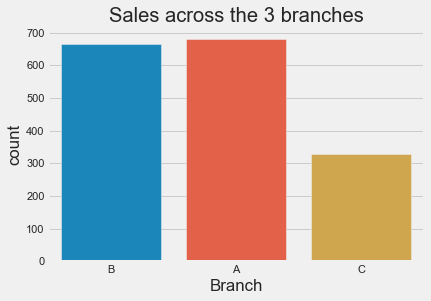

In [299]:
# Sales across the 3 branches
sns.countplot(x ='Branch', data = allBranch_df).set_title("Sales across the 3 branches")
 
# Show the plot
plt.show()

- Branch A with 340 sales has the highest number of sales

#### Explore a countplot for the `Payment` and `City` Column

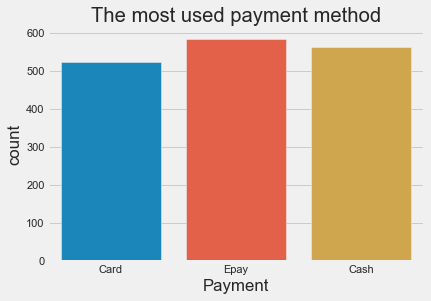

In [300]:
# The most used payment method
sns.countplot(x ='Payment', data = allBranch_df).set_title("The most used payment method")
 
# Show the plot
plt.show()

- Epay with  345 payments is the most used method

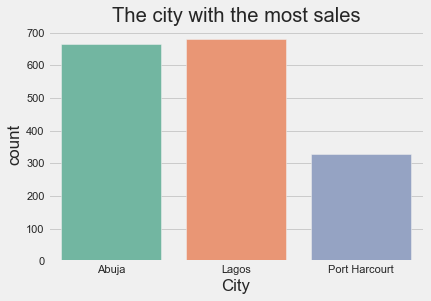

In [301]:
# The city with the most sales
sns.countplot(x ='City', data = allBranch_df, palette = "Set2").set_title("The city with the most sales")
 
# Show the plot
plt.show()

- Lagos with 340 sales has the highest number of sales

#### To-Do - Determine the highest & lowest sold product line, using Countplot 
Count Plot Tips- Set the `Product line` column to y-axis to prevent congestion on the x-axis

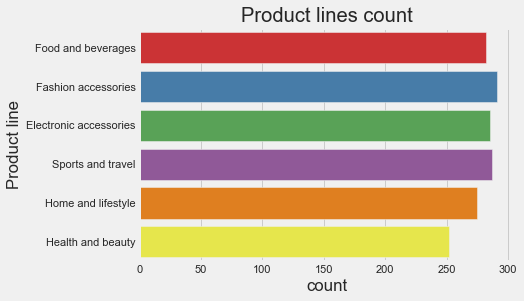

In [302]:
# Product lines 
sns.countplot(y ='Product line', data = allBranch_df, palette = "Set1").set_title("Product lines count")
 
# Show the plot
plt.show()


- Fashion Accessories is the highest sold product line while Health and Beauty is the lowest

#### To-Do -  Determine the Payment channel used by most customer to pay for each product line. Count Plot Tips- Set the "product line" column to y-axis to prevent congestion on the x-axis, and use the "hue" parameter for the "Payment" column. 

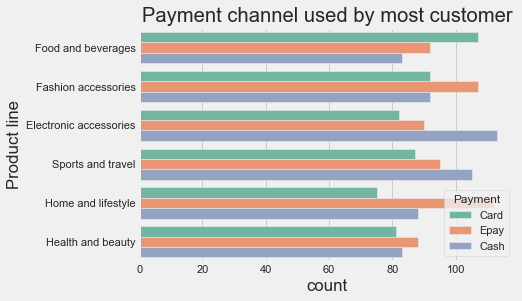

In [303]:
# Payment channel used by most customer for the product lines 
sns.countplot(y ='Product line', hue = "Payment", data = allBranch_df, palette = "Set2").set_title("Payment channel used by most customer")
# Show the plot
plt.show()


#### The most used payment channel

- Food and beverages:        Card
- Fashion accessories:       Epay
- Electronic accessories:    Cash
- Sports and travel:         Cash
- Home and lifestyle:        Epay
- Health and beauty:         Epay

#### To-Do- Determine the Payment channel for each branch.
Count Plot Tips - Use the hue parameter for the "branch" column

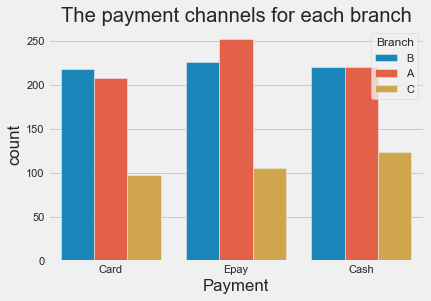

In [304]:
# Payment channel for each branch
sns.countplot(x ='Payment', hue = "Branch", data = allBranch_df).set_title("The payment channels for each branch")
# Show the plot
plt.show()

#### To-Do- Determine the branch with the lowest rating. This you can determine using abox plot which gives a statistical summary of the plotted features, and you can pick out the branch with the lowest rating from the plot

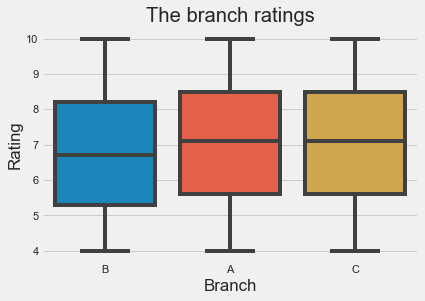

In [305]:
# The branch with the lowest rating
sns.boxplot(x='Branch', y="Rating", data=allBranch_df).set_title("The branch ratings")
plt.show()

- Branch B has the lowest rating

#### To-Do - The gender type often affects the kind of products being purchased at the supermarket. 
* Using a catplot() generate visualization for the "product line" on x-axis, quantity on the y-axis, and hue as gender. 
<br/>

#### Set the aspect parameter to 4, so can you can effectively space out each product line. 



* Plot the same chart, but `Total Column` as the y-axis

* Write a summary of the insights you can pick from this chart.

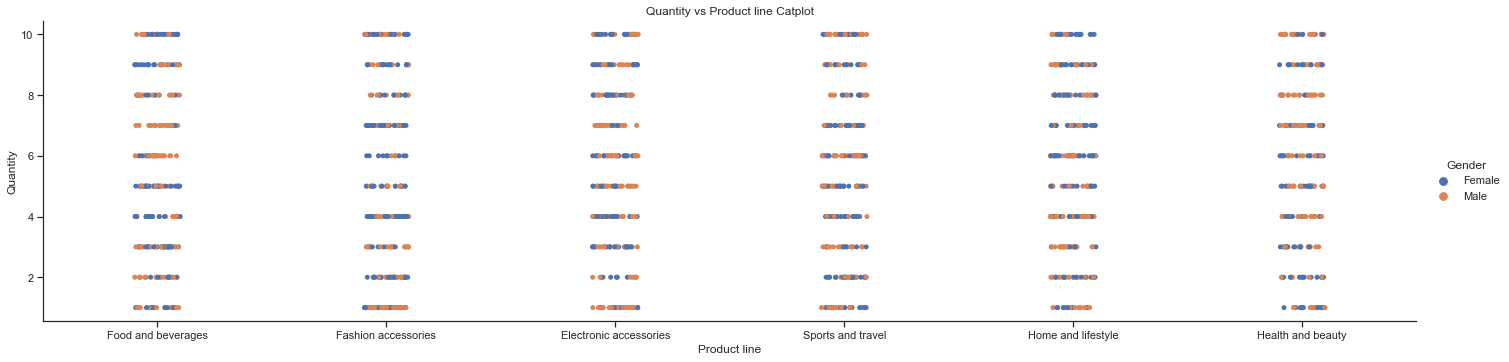

In [306]:
sns.set_theme(style="ticks")
g= sns.catplot(x="Product line", y="Quantity", hue="Gender", data=allBranch_df,  aspect=4) #kind="point"
g.ax.set_title("Quantity vs Product line Catplot")
plt.show()


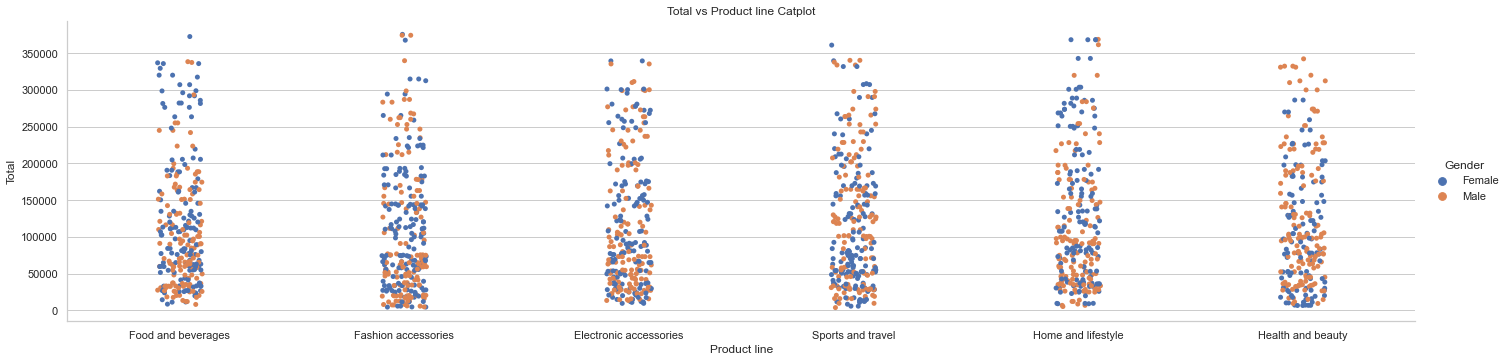

In [307]:
sns.set_theme(style="whitegrid")
g = sns.catplot(x="Product line", y="Total", hue="Gender", data=allBranch_df,  aspect=4) # kind="bar"
g.ax.set_title("Total vs Product line Catplot")
plt.show()

- The catplot shows a close match of male and female total spending below the average across the product lines. For Food and Beverages more females spend above N200,000 while for Health and Beauty more males spend above N250,000
- On the average women spend significantly more on Food and Beverages, Fashion Accessories, and Home and Lifestyle while men spend more on Health and Beauty

#### To-Do -  An interesting insight to explore is the interaction of Unit price on the Quantity of goods purchased. To achieve this: 
* Use the `catplot()` to plot `Product line per unit price`, and `Product line per Quantity`. Set the kind parameter to `point` 
* In a new cell, Write a summary of the insights you uncovered

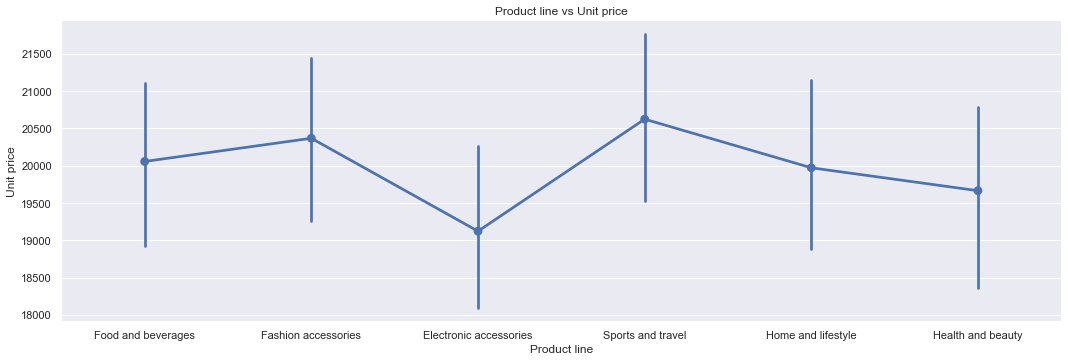

In [308]:
sns.set_theme(style="darkgrid")
g = sns.catplot(x="Product line", y="Unit price", data=allBranch_df, kind="point", aspect=3) 
g.ax.set_title("Product line vs Unit price")
plt.show()

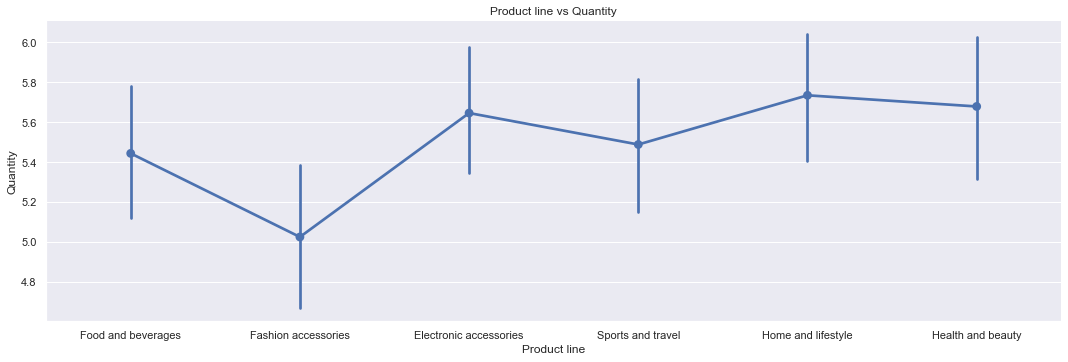

In [309]:
sns.set_theme(style="darkgrid")
g = sns.catplot(x="Product line", y="Quantity", data=allBranch_df, kind="point", aspect=3) 
g.ax.set_title("Product line vs Quantity")
plt.show()

- As shown in the central tendency plots, Fashion Accessories with a high average unit price has the lowest average quantity sold per transaction while Electronic Accessories with the lowest unit price has the highest average quantity sold. The other products are in between the two extremes and this indicates that unit price as a major impact on quantity of goods purchased

## Step 7 - StandOut Section
To make your submission standout, 
* You can continue to explore more insights that can be uncovered with different plotting methods.
* Write a detailed summary on your approach, methods and insights. 
* Visit the [link](https://seaborn.pydata.org/tutorial/categorical.html) for more Seaborn visualization plots.


In [310]:
product_order = allBranch_df.groupby("Product line")
# aggregation function of sum and mean on which column? Not stated.
gh = product_order.agg({'Total': ["sum", "mean"],'cogs': ["sum", "mean"],'gross income': ["sum", "mean"]})
gh.sort_index(level=[1],ascending=[False], sort_remaining=True)


Total                     cogs             \
                                 sum       mean           sum       mean   
Product line                                                               
Sports and travel      34,014,141.00 118,516.17 32,394,420.00 112,872.54   
Home and lifestyle     33,778,178.28 122,829.74 32,169,693.60 116,980.70   
Health and beauty      29,437,974.72 116,817.36 28,036,166.40 111,254.63   
Food and beverages     31,868,219.88 113,007.87 30,350,685.60 107,626.54   
Fashion accessories    31,338,619.20 107,692.85 29,846,304.00 102,564.62   
Electronic accessories 32,294,191.86 113,312.95 30,756,373.20 107,917.10   

                       gross income           
                                sum     mean  
Product line                                  
Sports and travel      1,619,721.00 5,643.63  
Home and lifestyle     1,608,484.68 5,849.04  
Health and beauty      1,401,808.32 5,562.73  
Food and beverages     1,517,534.28 5,381.33  
Fashion accessories    1,492,315.20 5,128.23  
Electronic accessories 1,537,818.66 5,395.85

In [311]:
# gross margin = Cost of goods sold * gross margin percentage/100
NewDatSer = allBranch_df['cogs'] * allBranch_df['gross margin percentage'] /100
allBranch_df.insert(loc=19, column="Gross margin", value=NewDatSer)
allBranch_df.head()

,Unnamed: 0.1,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,...,Year,Date,Hour,Time,Payment,cogs,Gross margin,gross margin percentage,gross income,Rating
0,0.00,692-92-5582,B,Abuja,Member,Female,Food and beverages,"19,742.40",3,"2,961.36",...,2019,2019-02-20,13,2022-02-06 13:27:00,Card,"59,227.20","2,820.34",4.76,"2,961.36",5.90
1,1.00,351-62-0822,B,Abuja,Member,Female,Fashion accessories,"5,212.80",4,"1,042.56",...,2019,2019-02-06,18,2022-02-06 18:07:00,Epay,"20,851.20",992.91,4.76,"1,042.56",4.50
2,2.00,529-56-3974,B,Abuja,Member,Male,Electronic accessories,"9,183.60",4,"1,836.72",...,2019,2019-03-09,17,2022-02-06 17:03:00,Cash,"36,734.40","1,749.26",4.76,"1,836.72",6.80
3,3.00,299-46-1805,B,Abuja,Member,Female,Sports and travel,"33,739.20",6,"10,121.76",...,2019,2019-01-15,16,2022-02-06 16:19:00,Cash,"202,435.20","9,639.77",4.76,"10,121.76",4.50
4,4.00,319-50-3348,B,Abuja,Normal,Female,Home and lifestyle,"14,508.00",2,"1,450.80",...,2019,2019-03-11,15,2022-02-06 15:30:00,Epay,"29,016.00","1,381.71",4.76,"1,450.80",4.40


In [312]:
city_order = allBranch_df.groupby("City")
# aggregation function of sum and mean on Gross margin
city_order.agg({'Gross margin': ["sum", "mean"]})

Gross margin         
                       sum     mean
City                               
Abuja         3,467,679.09 5,222.41
Lagos         3,467,767.20 5,099.66
Port Harcourt 1,805,203.37 5,503.67

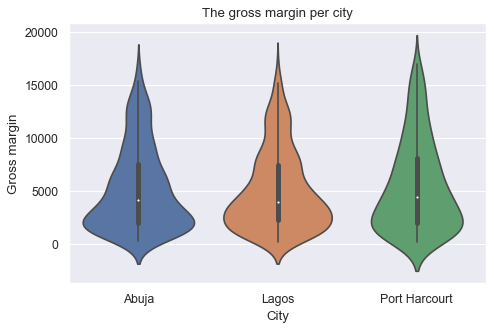

In [313]:
# The gross margin variation of each city
f, ax = plt.subplots(figsize=(6, 4), dpi=80)
g= sns.violinplot(x='City', y="Gross margin", data=allBranch_df).set_title("The gross margin per city")
plt.show()


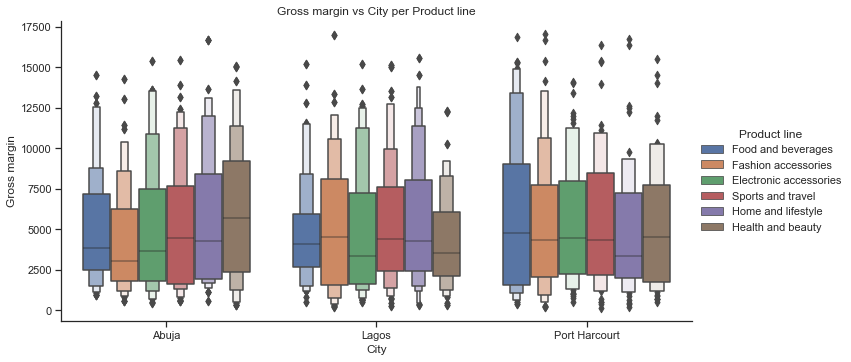

In [314]:
sns.set_theme(style="ticks")
g= sns.catplot(x="City", y="Gross margin", hue="Product line", data=allBranch_df, kind="boxen", aspect=2) 
g.ax.set_title("Gross margin vs City per Product line")
plt.show()

## Step 8 - Documentation.

* Write a detailed `ReadMe` that describes the project, explains important approach you followed to solve the tasks. Find a template in the starter file that can get you started quickly. Note: Do limit yourself to the template, you can include any interesting step that is worth sharing. 
* Write an Executive summary that you can present to `Company XYZ` management. The summary will explain your processes and insights you uncovered that can help the company 